In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463307 sha256=4f55af6b05392028075a06090c4d1285e3e5b30ed78a79513b3eea5202b82d65
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 wh

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463303 sha256=5e5daf445823c9bd7c4ed6a4eaf2ea2d42cb66e1b54ae0f2bbf1b86189448968
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.similarities import cosine
from surprise.model_selection import GridSearchCV
from surprise.accuracy import mae

df_movies = pd.read_csv('/content/drive/MyDrive/CF-KNN-Surprise/ml-latest-small/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/CF-KNN-Surprise/ml-latest-small/ratings.csv')

reader = Reader(rating_scale=(1, 5))

Praproses

In [ ]:
# Menggabungkan movies_csv dan ratings_csv menggunakan pd.merge dengan kunci 'movieId'
df_merged = pd.merge(df_ratings, df_movies, on='movieId')
df_merged[['userId', 'movieId', 'rating','timestamp','title','genres']]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5,1494273047,Get Out (2017),Horror
100834,610,168252,5,1493846352,Logan (2017),Action|Sci-Fi


In [ ]:
movie_data = df_merged[['userId', 'movieId', 'rating']]

User-Item Matriks

In [ ]:
# Membuat user_item_matrix menggunakan pivot tabel
user_item_matrix = movie_data.pivot_table(index='userId', columns='movieId', values='rating')

# isi NaN values dengan 0
user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting Data

In [ ]:
# Splitting Data 80:20

movie_data = movie_data.sample(frac=1, random_state=42)
split_index = int(0.8 * len(movie_data))
train_movie_df = movie_data[:split_index]
test_movie_df = movie_data[split_index:]

train_movie_data = Dataset.load_from_df(train_movie_df[['userId', 'movieId', 'rating']], reader)
test_movie_data = Dataset.load_from_df(test_movie_df[['userId', 'movieId', 'rating']], reader)

Defining Parameter GridSearchCV

In [ ]:
# Mendefinisikan parameter grid untuk GridSearchCV
param_grid = {
    'min_k': (range(1,16)),
    'sim_options': {
        'name': ['cosine'],
        'user_based': [True]
    }
}

# Menggunakan GridSearchCV untuk hyperparameter
gs_movie = GridSearchCV(KNNBasic, param_grid, measures=['mae'], cv=10)

# Melatih model dengan GridSearchCV
gs_movie.fit(train_movie_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
# Melihat hasil evaluasi GridSearchCV
results_movie = pd.DataFrame(gs_movie.cv_results)

results_movie[['rank_test_mae','mean_test_mae',
         'std_test_mae','param_min_k','params','split0_test_mae',
         'split1_test_mae','split2_test_mae','split3_test_mae','split4_test_mae','split5_test_mae',
          'split6_test_mae','split7_test_mae','split8_test_mae','split9_test_mae']]

,rank_test_mae,mean_test_mae,std_test_mae,param_min_k,params,split0_test_mae,split1_test_mae,split2_test_mae,split3_test_mae,split4_test_mae,split5_test_mae,split6_test_mae,split7_test_mae,split8_test_mae,split9_test_mae
0,12,0.723432,0.009112,1,"{'min_k': 1, 'sim_options': {'name': 'cosine',...",0.716253,0.718535,0.742938,0.717451,0.712623,0.726958,0.724660,0.717717,0.720792,0.736394
1,7,0.719884,0.009150,2,"{'min_k': 2, 'sim_options': {'name': 'cosine',...",0.713108,0.714144,0.738266,0.716318,0.708339,0.722814,0.722095,0.711878,0.718086,0.733797
2,3,0.718345,0.008460,3,"{'min_k': 3, 'sim_options': {'name': 'cosine',...",0.710775,0.711891,0.735892,0.715201,0.708622,0.721664,0.722531,0.711328,0.716160,0.729383
3,1,0.717645,0.008195,4,"{'min_k': 4, 'sim_options': {'name': 'cosine',...",0.711532,0.712757,0.733447,0.714681,0.705960,0.720172,0.722732,0.710769,0.715336,0.729065
4,2,0.718134,0.007736,5,"{'min_k': 5, 'sim_options': {'name': 'cosine',...",0.712422,0.714707,0.732452,0.714453,0.707110,0.719135,0.722745,0.711391,0.716778,0.730150
5,4,0.718639,0.008089,6,"{'min_k': 6, 'sim_options': {'name': 'cosine',...",0.711075,0.716110,0.733460,0.713847,0.707646,0.720144,0.723834,0.710985,0.718843,0.730448
6,5,0.719019,0.008178,7,"{'min_k': 7, 'sim_options': {'name': 'cosine',...",0.712062,0.716492,0.734376,0.713864,0.708293,0.720287,0.723467,0.711065,0.718942,0.731345
7,6,0.719794,0.008222,8,"{'min_k': 8, 'sim_options': {'name': 'cosine',...",0.713125,0.717239,0.734379,0.713682,0.708084,0.721710,0.724143,0.712667,0.720304,0.732607
8,8,0.720557,0.008102,9,"{'min_k': 9, 'sim_options': {'name': 'cosine',...",0.713441,0.717308,0.734485,0.714605,0.709234,0.721439,0.725500,0.713706,0.722599,0.733255
9,9,0.721488,0.007935,10,"{'min_k': 10, 'sim_options': {'name': 'cosine'...",0.714355,0.718461,0.734723,0.714952,0.710662,0.723277,0.726553,0.714514,0.723526,0.733852


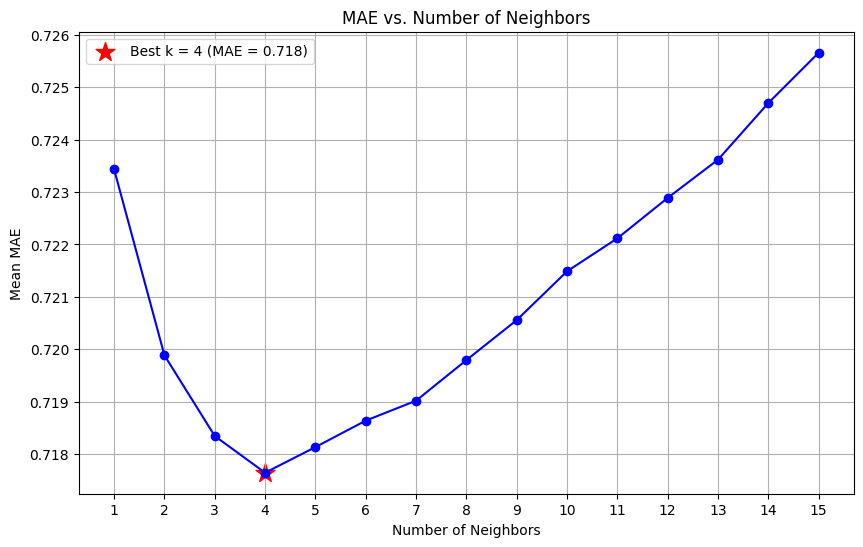

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE vs. K
plt.figure(figsize=(10, 6))
plt.plot(results_movie['param_min_k'], results_movie['mean_test_mae'], marker='o', color='blue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MAE')
plt.title('MAE vs. Number of Neighbors')
plt.grid(True)

# Menemukan K terbaik
best_k = results_movie.loc[results_movie['mean_test_mae'].idxmin()]['param_min_k']
best_mae = results_movie['mean_test_mae'].min()

# Highlight K terbaik dengan mark *
plt.scatter(best_k, best_mae, marker='*', s=200, color='red', label=f'Best k = {best_k} (MAE = {best_mae:.3f})')
plt.legend()

# Mengatur x_axis ke int
plt.xticks(results_movie['param_min_k'].astype(int))

plt.show()

In [ ]:
# Mendapatkan model terbaik berdasarkan MAE
best_movie_model = gs_movie.best_estimator['mae']
print("Parameter terbaik berdasarkan MAE:", gs_movie.best_params['mae'])

Parameter terbaik berdasarkan MAE: {'min_k': 4, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
# Melatih Parameter Terbaik
trainset_movie = train_movie_data.build_full_trainset()

best_movie_model.fit(trainset_movie)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Cosine Similarity

In [ ]:
# Ambil matriks similarity
movie_sim = best_movie_model.sim

#Mendapatkan daftar user
daftar_user_movie = trainset_movie.to_inner_uid(trainset_movie.n_users) # This line was incorrect
user_movie_ids = [trainset_movie.to_raw_uid(inner_id) for inner_id in range(trainset_movie.n_users)] # Use trainset_weekday directly

# Konversi ke DataFrame untuk visualisasi
import pandas as pd
movie_sim_df = pd.DataFrame(movie_sim, index=user_movie_ids, columns=user_movie_ids)

# Urutkan indeks (dan kolom) berdasarkan userId asli
movie_sim_df = movie_sim_df.sort_index(axis=0).sort_index(axis=1)

# Tampilkan sebagian matriks similarity
print("Matriks Cosine Similarity :")
daftar_user_movie
movie_sim_df

Matriks Cosine Similarity :


,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.000000,0.914576,0.964874,0.984405,0.950732,0.948503,0.992786,0.992781,0.956674,...,0.990595,0.932275,0.949069,0.961681,0.943901,0.971345,0.969600,0.964554,0.978232,0.981634
2,0.000000,1.000000,0.000000,0.000000,1.000000,0.989949,0.970143,0.000000,0.000000,0.861813,...,0.979450,1.000000,1.000000,0.000000,0.000000,0.992302,1.000000,0.978709,0.000000,0.989127
3,0.914576,0.000000,1.000000,1.000000,1.000000,0.858128,0.000000,1.000000,0.000000,0.000000,...,0.839570,1.000000,0.932282,0.000000,1.000000,0.810255,0.970143,0.759072,0.000000,0.903327
4,0.964874,0.000000,1.000000,1.000000,0.958517,0.930145,0.973343,0.978436,0.000000,0.878527,...,0.988439,0.944942,0.950402,0.957024,0.958352,0.950694,0.901696,0.920774,0.999512,0.964228
5,0.984405,1.000000,1.000000,0.958517,1.000000,0.962260,0.954864,0.958868,0.000000,0.989949,...,0.980666,0.941339,0.921678,0.958458,0.965073,0.960708,0.975125,0.949133,0.992243,0.952763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.971345,0.992302,0.810255,0.950694,0.960708,0.966124,0.943298,0.971620,0.972187,0.930535,...,0.985588,0.977192,0.957543,0.978573,0.969501,1.000000,0.948897,0.961561,0.981495,0.975640
607,0.969600,1.000000,0.970143,0.901696,0.975125,0.965629,0.970669,0.963136,0.000000,1.000000,...,0.993243,0.942717,0.939489,0.956847,0.924880,0.948897,1.000000,0.963334,0.970143,0.965694
608,0.964554,0.978709,0.759072,0.920774,0.949133,0.945914,0.943057,0.964246,0.936454,0.887341,...,0.990220,0.954578,0.935457,0.955300,0.937334,0.961561,0.963334,1.000000,0.977049,0.958838
609,0.978232,0.000000,0.000000,0.999512,0.992243,0.996317,0.982397,0.970588,0.000000,0.857493,...,1.000000,0.971359,0.969117,0.986183,0.993884,0.981495,0.970143,0.977049,1.000000,0.966782


Prediksi Rating

In [ ]:
# Konversi data uji ke format testset yang digunakan surprise
testset_movie = test_movie_data.build_full_trainset().build_testset()

# Gunakan model terbaik untuk membuat prediksi
predictions_act = best_movie_model.test(testset_movie)

# Bandingkan rating aktual dan prediksi
predictions_act_df = pd.DataFrame(
    [(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_act],
    columns=['userId', 'movieId', 'actual_rating', 'predicted_rating']
)

# Gabungkan dengan df_movies untuk menambahkan title dan genres
predictions_act_df = pd.merge(predictions_act_df, df_movies[['movieId', 'title', 'genres']], on='movieId', how='left')

# Tampilkan hasil
predictions_act_df_sorted = predictions_act_df.sort_values(by=['actual_rating', 'predicted_rating'], ascending=False)
predictions_act_df_sorted

,userId,movieId,actual_rating,predicted_rating,title,genres
15469,410,6460,5.0,5.000000,"Trial, The (Procès, Le) (1962)",Drama
14870,421,1178,5.0,4.874425,Paths of Glory (1957),Drama|War
16211,219,318,5.0,4.825089,"Shawshank Redemption, The (1994)",Crime|Drama
9127,221,2959,5.0,4.774997,Fight Club (1999),Action|Crime|Drama|Thriller
7388,387,858,5.0,4.774992,"Godfather, The (1972)",Crime|Drama
...,...,...,...,...,...,...
7498,387,2799,1.0,2.172450,Problem Child 2 (1991),Comedy
17079,559,374,1.0,2.168741,Richie Rich (1994),Children|Comedy
8079,160,374,1.0,2.166253,Richie Rich (1994),Children|Comedy
6298,414,8666,1.0,1.998680,Catwoman (2004),Action|Crime|Fantasy


In [ ]:
predictions_act_df_sorted[predictions_act_df_sorted['userId'] == 1].head(10)

,userId,movieId,actual_rating,predicted_rating,title,genres
9280,1,2959,5.0,4.700324,Fight Club (1999),Action|Crime|Drama|Thriller
9272,1,1213,5.0,4.650256,Goodfellas (1990),Crime|Drama
9271,1,527,5.0,4.576333,Schindler's List (1993),Drama|War
9262,1,260,5.0,4.549563,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
9288,1,2502,5.0,4.448098,Office Space (1999),Comedy|Crime
9265,1,608,5.0,4.425840,Fargo (1996),Comedy|Crime|Drama|Thriller
9279,1,3147,5.0,4.400298,"Green Mile, The (1999)",Crime|Drama
9251,1,2858,5.0,4.325108,American Beauty (1999),Drama|Romance
9263,1,954,5.0,4.232594,Mr. Smith Goes to Washington (1939),Drama
9245,1,1224,5.0,4.200475,Henry V (1989),Action|Drama|Romance|War


Hasil Rekomendasi

In [ ]:
import pandas as pd
from collections import defaultdict

def get_top_n(predictions_movie, df_movies, n=10):
    # Petakan prediksi ke setiap pengguna
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_movie:
        # Cari informasi film dari df_movies
        movie_info = df_movies[df_movies['movieId'] == iid]

        if not movie_info.empty:
            title = movie_info['title'].values[0]
            genres = movie_info['genres'].values[0]
            top_n[uid].append((uid, iid, est, title, genres))

    # Urutkan prediksi untuk setiap pengguna dan ambil k prediksi teratasnya
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Prediksi
testset_predict = trainset_movie.build_anti_testset()
predictions_movie = best_movie_model.test(testset_predict)

# Dapatkan top-n rekomendasi
top_n = get_top_n(predictions_movie, df_movies, n=10)

# Buat list untuk menyimpan semua rekomendasi
all_recommendations = []

# Tambahkan rekomendasi ke list
for uid, user_ratings in top_n.items():
    all_recommendations.extend(user_ratings)

# Buat DataFrame dari rekomendasi
recommendations_df = pd.DataFrame(all_recommendations,
                                  columns=['userId', 'movieId', 'predicted_ratings', 'title', 'genres'])

# Tampilkan DataFrame
recommendations_df.head(10)

,userId,movieId,predicted_ratings,title,genres
0,432,6460,5.000000,"Trial, The (Procès, Le) (1962)",Drama
1,432,177593,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,432,158966,5.000000,Captain Fantastic (2016),Drama
3,432,43376,5.000000,Sophie Scholl: The Final Days (Sophie Scholl -...,Drama|War
4,432,1178,4.872578,Paths of Glory (1957),Drama|War
5,432,106642,4.832174,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi
6,432,1446,4.807197,Kolya (Kolja) (1996),Comedy|Drama
7,432,31364,4.798842,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
8,432,27156,4.754507,Neon Genesis Evangelion: The End of Evangelion...,Action|Animation|Drama|Fantasy|Sci-Fi
9,432,55167,4.753922,Tekkonkinkreet (Tekkon kinkurîto) (2006),Action|Adventure|Animation|Crime|Fantasy


In [ ]:
recommendations_df[recommendations_df['userId']==1]

,userId,movieId,predicted_ratings,title,genres
920,1,177593,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
921,1,158966,5.000000,Captain Fantastic (2016),Drama
922,1,6460,5.000000,"Trial, The (Procès, Le) (1962)",Drama
923,1,43376,5.000000,Sophie Scholl: The Final Days (Sophie Scholl -...,Drama|War
924,1,1178,4.874063,Paths of Glory (1957),Drama|War
925,1,106642,4.829769,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi
926,1,1446,4.807377,Kolya (Kolja) (1996),Comedy|Drama
927,1,31364,4.798460,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
928,1,436,4.754354,Color of Night (1994),Drama|Thriller
929,1,55167,4.751792,Tekkonkinkreet (Tekkon kinkurîto) (2006),Action|Adventure|Animation|Crime|Fantasy


In [ ]:
from surprise import accuracy
from surprise.accuracy import mae

# Evaluasi akurasi
acc_predict_movie = best_movie_model.test(testset_movie)
mae = accuracy.mae(acc_predict_movie)

MAE:  0.7236
